In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
import h5py

In [2]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


# I. Data check

In [3]:
df=pd.read_csv('TECAN_210908.csv',delimiter=',',index_col=0)  

## Cycle Nr. to add Kan: 12, 23, 34

In [4]:
t_array = df.to_numpy()[0]/60; # in min; 
print(t_array[11])

64.28833333333334


## check temperature

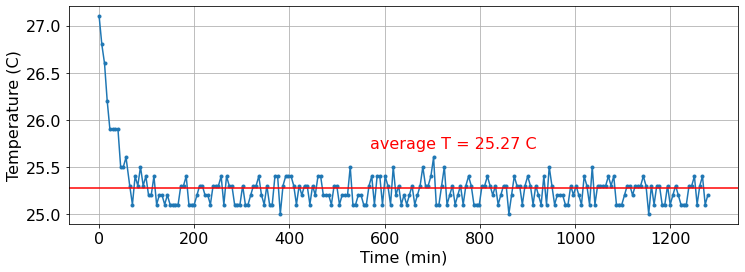

In [8]:
def f_constant(x,c):
    return c
xdata = df.to_numpy()[0]/60;
ydata = df.to_numpy()[1];
param, cov = curve_fit(f_constant, xdata[1:], ydata[1:])
av_T = str(param[0])[:5]
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata, '.-')
plt.axhline(param[0],color='r')
plt.text(570, 25.7, 'average T = '+av_T+' C', color='red')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')
plt.grid(True)

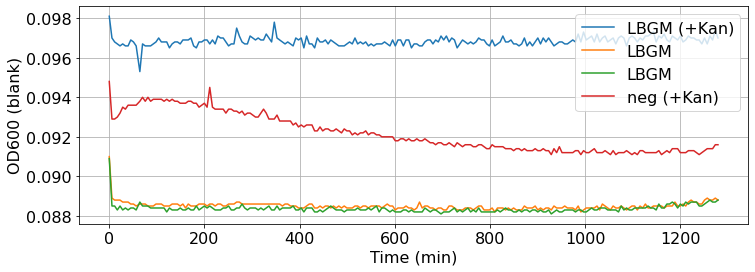

In [10]:
xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['D4'].to_numpy()
ydata2 = df.loc['D5'].to_numpy()
ydata3 = df.loc['D6'].to_numpy()
ydata4 = df.loc['D1'].to_numpy()
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata1,label='LBGM (+Kan)')
plt.plot(xdata, ydata2,label='LBGM')
plt.plot(xdata, ydata3,label='LBGM')
plt.plot(xdata, ydata4,label='neg (+Kan)')
plt.xlabel('Time (min)')
plt.ylabel('OD600 (blank)')
plt.grid('on')
plt.legend()

## check other samples

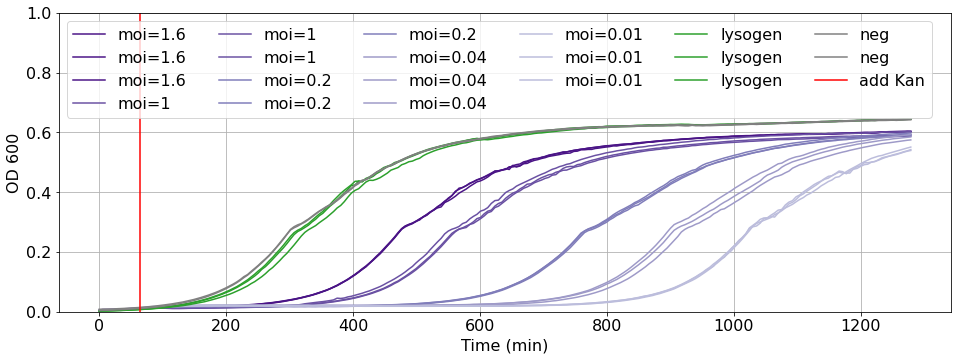

In [38]:
idx = np.arange(2,20,1);
idx = np.concatenate((idx, np.array([21,22])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx] - np.mean(df.loc[['D5','D6']].to_numpy(), axis=0)
labels = ['moi=1.6', 'moi=1.6', 'moi=1.6', \
         'moi=1', 'moi=1', 'moi=1', \
          'moi=0.2', 'moi=0.2', 'moi=0.2', \
          'moi=0.04', 'moi=0.04', 'moi=0.04', \
          'moi=0.01', 'moi=0.01', 'moi=0.01', \
          'lysogen','lysogen','lysogen',
         'neg','neg']; 
colors = ['#4a1486','#4a1486','#4a1486',\
          '#6a51a3','#6a51a3','#6a51a3',\
          '#807dba','#807dba','#807dba',\
          '#9e9ac8','#9e9ac8','#9e9ac8',\
          '#bcbddc','#bcbddc','#bcbddc',\
          'tab:green','tab:green','tab:green',\
         'grey','grey']; 
plt.rcParams["figure.figsize"] = (16,5.5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
plt.ylim(0,1)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.axvline(64, color='red',label='add Kan')
plt.legend(ncol=6,loc='upper left')

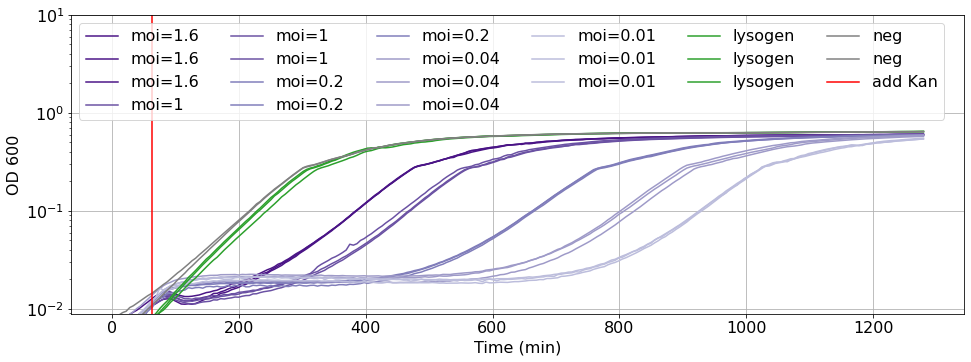

In [36]:
idx = np.arange(2,20,1);
idx = np.concatenate((idx, np.array([21,22])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx] - np.mean(df.loc[['D5','D6']].to_numpy(), axis=0)
labels = ['moi=1.6', 'moi=1.6', 'moi=1.6', \
         'moi=1', 'moi=1', 'moi=1', \
          'moi=0.2', 'moi=0.2', 'moi=0.2', \
          'moi=0.04', 'moi=0.04', 'moi=0.04', \
          'moi=0.01', 'moi=0.01', 'moi=0.01', \
          'lysogen','lysogen','lysogen',
         'neg','neg']; 
colors = ['#4a1486','#4a1486','#4a1486',\
          '#6a51a3','#6a51a3','#6a51a3',\
          '#807dba','#807dba','#807dba',\
          '#9e9ac8','#9e9ac8','#9e9ac8',\
          '#bcbddc','#bcbddc','#bcbddc',\
          'tab:green','tab:green','tab:green',\
         'grey','grey']; 
plt.rcParams["figure.figsize"] = (16,5.5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
plt.ylim(0.0089,10)
plt.axvline(64, color='red',label='add Kan')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.yscale('log')
plt.legend(ncol=6,loc='upper left')

# II. Growth rate estimation

In [67]:
def get_linear_range(time, data, start_thresh, R_square_thresh, min_points, plot_yes):
#    R_square_thresh = 0.999; 
    
    # skip nan
    start_idx = 0; 
    tmp = np.where(np.isnan(data)==True)[0]
    if len(tmp) > 0:
        start_idx = tmp[-1]
        
    # skip low values
    tmp = np.where(data >= np.log2(start_thresh))[0]
    if len(tmp) > 0:
        start_idx = max(start_idx, tmp[0])
        
    # choose starting point
    end_idx = min(start_idx+200, len(data)); 
    starting_idx = np.arange(start_idx,end_idx,1);
#    print(start_idx)
#    print(end_idx)
    R_square0 = np.array([]);
    for j in starting_idx:
        xdata = time[j:j+12];
        ydata = data[j:j+12];
        slope, intercept, r_value, _, _ = linregress(xdata, ydata);
        R_square0 = np.append(R_square0, r_value);
    
    if (len(np.where(R_square0>R_square_thresh)[0]) == 0):
        print('fail to find starting points: please lower R_square_thresh');
        return np.array([0,0])
    else:
        j_0 = starting_idx[np.where(R_square0>R_square_thresh)[0][0]];
    
        # choose number of fitting points
        R_square = np.array([]);
        max_points_allowed = len(data)-j_0;
        if max_points_allowed == 0:
            print('fail to find #fitting points: please lower R_square_thresh');
            return np.array([0,0])
        else:
            if max_points_allowed <= min_points: #what about = 0? 
                fitting_points = np.array([max_points_allowed]);
            else:
                fitting_points = np.arange(min_points,min(50,max_points_allowed),1);
            for j in fitting_points:
                xdata = time[j_0:j_0+j];
                ydata = data[j_0:j_0+j];
                slope, intercept, r_value, _, _ = linregress(xdata, ydata);
                R_square = np.append(R_square, r_value);
            tmp2 = np.argmax(R_square);
            j = fitting_points[tmp2]; 
            if plot_yes == True:
                plt.rcParams["figure.figsize"] = (8,7)
                subplot(2,1,1)
                plt.plot(starting_idx, R_square0,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j_0,color='k',alpha = 0.5);
                plt.xlabel('index of fitting start point')
                plt.ylabel('R squared')
                plt.grid(True)
                subplot(2,1,2)
                plt.plot(fitting_points, R_square,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j,color='k',alpha = 0.5);
                plt.xlabel('number of fitting points')
                plt.ylabel('R squared')
                plt.grid(True)
                plt.tight_layout()
            return np.array([j_0, j]);
    

<ipython-input-68-665c84b68501>:15: RuntimeWarning: invalid value encountered in log2
  get_linear_range(time, np.log2(df.to_numpy()[0]-ave_blank), 0.02, 0.999, 39, 1)


array([29, 39])

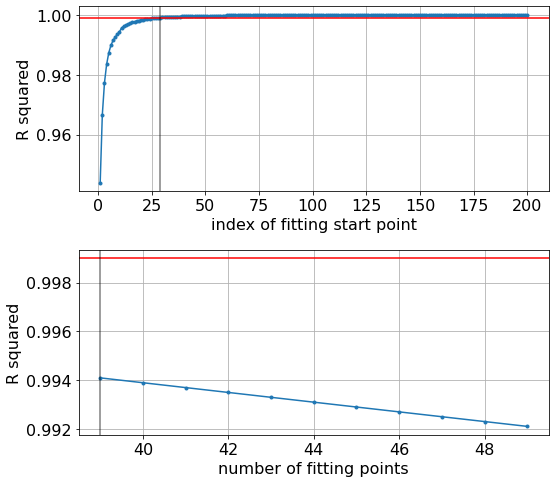

In [68]:
MOI_16 = np.array([2,3,4])
MOI_1 = np.array([5,6,7])
MOI_02 = np.array([8,9,10])
MOI_004 = np.array([11,12,13])
MOI_001 = np.array([14,15,16])
idx_lys = np.array([17,18,19])
idx_neg = np.array([21,22])
idx_blank = np.array([24,25])

time = df.to_numpy()[0]/60

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)


get_linear_range(time, np.log2(df.to_numpy()[0]-ave_blank), 0.02, 0.999, 39, 1)

In [69]:
sample_d = {};

class Sample:
    def __init__(self, name, sample_idx, growth_rate,N0):
        self.sample_name = name
        self.sample_idx = sample_idx
        self.growth_rate = growth_rate
        self.N0 = N0

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/turtle/anaconda3/lib/python3.8

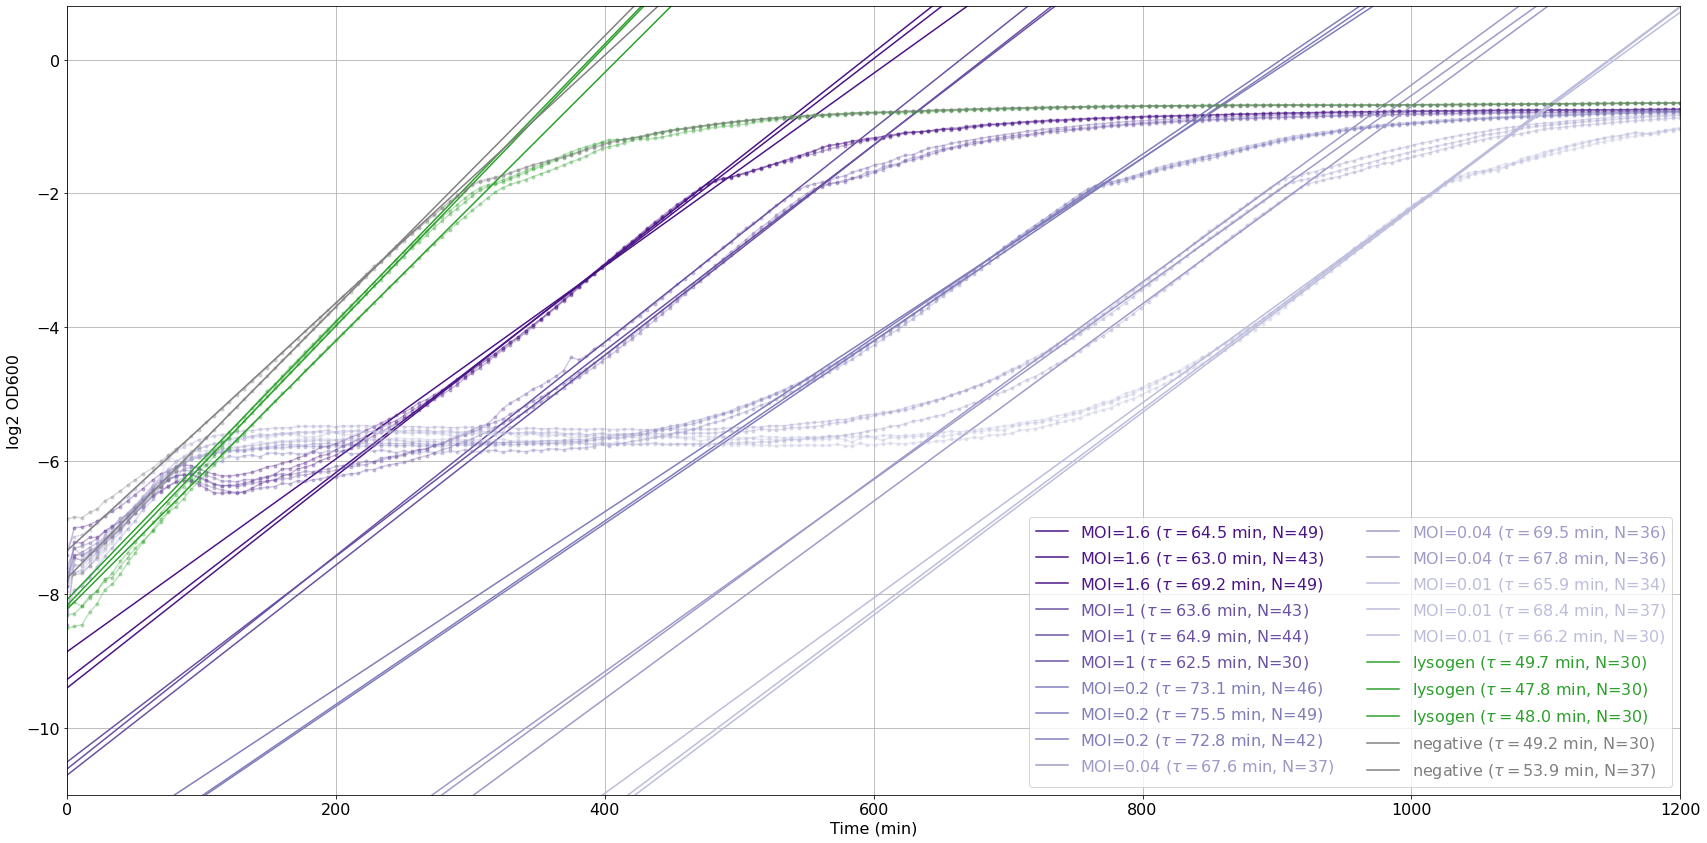

In [157]:
MOI_16 = np.array([2,3,4])
MOI_1 = np.array([5,6,7])
MOI_02 = np.array([8,9,10])
MOI_004 = np.array([11,12,13])
MOI_001 = np.array([14,15,16])
idx_lys = np.array([17,18,19])
idx_neg = np.array([21,22])
idx_blank = np.array([24,25])

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (24,12)
k = 0;
labels = ['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01','lysogen','negative']
colors = ['#4a1486','#6a51a3','#807dba','#9e9ac8','#bcbddc','tab:green','grey']
for i in (MOI_16, MOI_1, MOI_02, MOI_004, MOI_001, idx_lys, idx_neg):
    sample = np.log2(df.to_numpy()[i]-ave_blank);
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        if k == 0:
            array_tmp = get_linear_range(time, data, 0.015, 0.999, 30, 0);
        else:
            array_tmp = get_linear_range(time, data,0.015, 0.999, 30, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j_0 < min_j0:
            min_j0 = j_0; 
        if j+j_0 > max_j:
            max_j = j+j_0; 
        xdata = time[j_0:j_0+j];
        ydata = data[j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        sample_d[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept);         
        generation_time = str(1/slope)[:4]; 
        plt.plot(time, data, '.-',color = colors[k], alpha=0.3);
        plt.plot(time, slope*time+intercept, '-', color = colors[k], \
                 label=labels[k]+' ('+r'$\tau=$'+generation_time+' min,'+' N='+str(j)+')')
#        plt.axvspan(time[j_0], time[j_0+j], facecolor=colors[k], alpha=0.05)
    k = k+1; 
plt.xlim((0,1200))
plt.ylim((-11,0.8))
plt.legend(labelcolor='linecolor',ncol=2); 
plt.grid(True);
plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
plt.tight_layout()

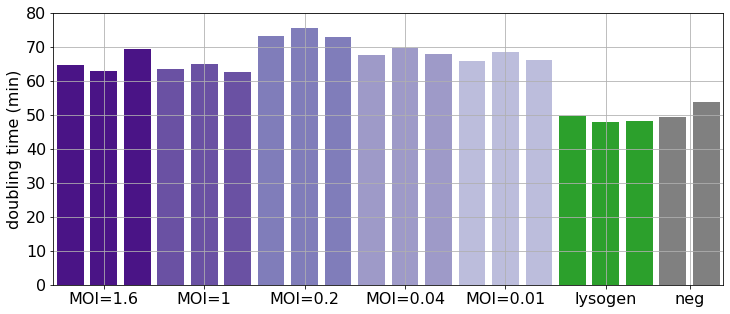

In [123]:
labels = ['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01','lysogen','negative']
colors = ['#4a1486','#6a51a3','#807dba','#9e9ac8','#bcbddc','tab:green','grey']

k = 0; 
colors_d = dict()
for k in range(0,len(colors)):
    colors_d[labels[k]] = colors[k]; 

kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (12,5)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    plt.bar(kk, sample_d[i].growth_rate, color=color,label=sample_d[i].sample_name)
    labels.append(name); 
    xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
    kk = kk+1;
#plt.grid(True)

plt.ylim((0,80))
plt.xlim((-0.5,19.5))
#plt.legend(fontsize=12,ncol=4,framealpha=1)
plt.xticks([1,4,7,10,13,16,18.5],['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01','lysogen','neg']); 
plt.ylabel('doubling time (min)')
plt.grid(True)

(0.005, 2)

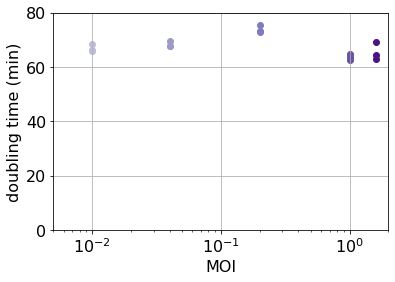

In [100]:
kk = 0;
xdata = [];
ydata = [];
labels = [];
plt.rcParams["figure.figsize"] = (6,4)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    x_ = 0; 
    if "MOI=1.6" in name:
        x_ = 1.6;
    elif name == "MOI=1":
        x_ = 1;
    elif "MOI=0.2" in name:
        x_ = 0.2;
    elif "MOI=0.04" in name:
        x_ = 0.04;
    elif "MOI=0.01" in name:
        x_ = 0.01;
    if i in [17,18,19,21,22]:
        next;
    else:
        plt.scatter(x_, sample_d[i].growth_rate, color=color)# , label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(sample_d[i].growth_rate)
        kk = kk+1;
    
#slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
#x_data = np.arange(40,200,1)
#plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
#plt.ylim((32,48))
#plt.legend(loc='upper left')
plt.ylabel('doubling time (min)')
plt.xlabel('MOI')
plt.grid(True)
plt.xscale('log')
plt.ylim(0,80)
plt.xlim(0.005,2)

([<matplotlib.axis.XTick at 0x7fc6a24d2070>,
 [Text(0, 0, 'MOI=1.6'),
  Text(1, 0, 'MOI=1'),
  Text(2, 0, 'MOI=0.2'),
  Text(3, 0, 'MOI=0.04'),
  Text(4, 0, 'MOI=0.01'),
  Text(5, 0, 'lysogen'),
  Text(6, 0, 'negative')])

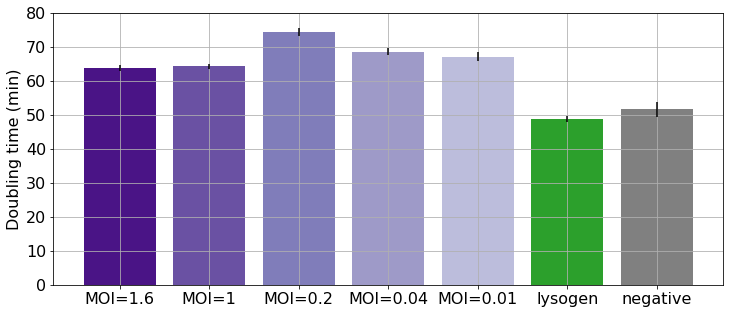

In [139]:
MOI_16 = np.array([2,3,4])
MOI_1 = np.array([5,6,7])
MOI_02 = np.array([8,9,10])
MOI_004 = np.array([11,12,13])
MOI_001 = np.array([14,15,16])
idx_lys = np.array([17,18,19])
idx_neg = np.array([21,22])
idx_blank = np.array([24,25])

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (12,5)
k = 0;
labels = ['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01','lysogen','negative']
colors = ['#4a1486','#6a51a3','#807dba','#9e9ac8','#bcbddc','tab:green','grey']
for i in (MOI_16, MOI_1, MOI_02, MOI_004, MOI_001, idx_lys, idx_neg):
    growth_rate_all = np.array([]);
    for kk in range(0,len(sample)):
        growth_rate_all = np.append(growth_rate_all, sample_d[i[kk]].growth_rate); 
    growth_rate_mean = np.mean(growth_rate_all);
    growth_rate_err = np.std(growth_rate_all); 
    plt.bar(k, growth_rate_mean, yerr=growth_rate_err, color = colors[k],label=labels[k])
    k = k+1; 
#plt.xlim((0,100))
plt.ylim((0,80))
#plt.legend(labelcolor='linecolor',ncol=4); 
plt.grid(True);
plt.ylabel('Doubling time (min)'); 
#plt.xlabel('Time (min)')
plt.xticks([0,1,2,3,4,5,6],labels)
#plt.tight_layout()

## check N0

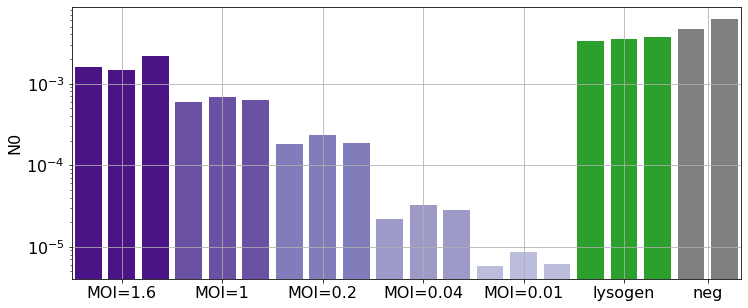

In [126]:
labels = ['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01','lysogen','negative']
colors = ['#4a1486','#6a51a3','#807dba','#9e9ac8','#bcbddc','tab:green','grey']

k = 0; 
colors_d = dict()
for k in range(0,len(colors)):
    colors_d[labels[k]] = colors[k]; 

kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (12,5)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    plt.bar(kk, np.power(2,sample_d[i].N0), color=color,label=sample_d[i].sample_name)
    labels.append(name); 
    xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
    kk = kk+1;
#plt.grid(True)

#plt.ylim((0,80))
plt.xlim((-0.5,19.5))
#plt.legend(fontsize=12,ncol=4,framealpha=1)
plt.xticks([1,4,7,10,13,16,18.5],['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01','lysogen','neg']); 
plt.ylabel('N0')
plt.grid(True)
plt.yscale('log')

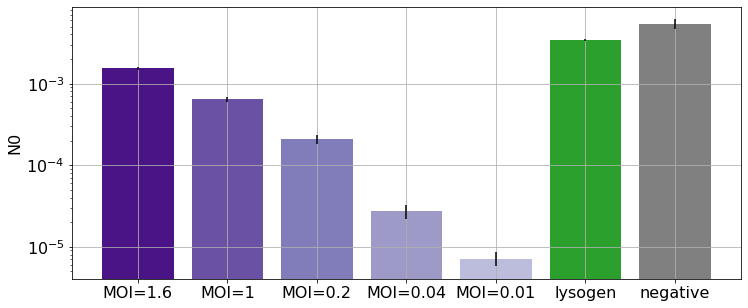

In [141]:
MOI_16 = np.array([2,3,4])
MOI_1 = np.array([5,6,7])
MOI_02 = np.array([8,9,10])
MOI_004 = np.array([11,12,13])
MOI_001 = np.array([14,15,16])
idx_lys = np.array([17,18,19])
idx_neg = np.array([21,22])
idx_blank = np.array([24,25])

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (12,5)
k = 0;
labels = ['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01','lysogen','negative']
colors = ['#4a1486','#6a51a3','#807dba','#9e9ac8','#bcbddc','tab:green','grey']
for i in (MOI_16, MOI_1, MOI_02, MOI_004, MOI_001, idx_lys, idx_neg):
    growth_rate_all = np.array([]);
    for kk in range(0,len(sample)):
        growth_rate_all = np.append(growth_rate_all, np.power(2, sample_d[i[kk]].N0)); 
    growth_rate_mean = np.mean(growth_rate_all);
    growth_rate_err = np.std(growth_rate_all); 
    plt.bar(k, growth_rate_mean, yerr=growth_rate_err, color = colors[k],label=labels[k])
    k = k+1; 
#plt.xlim((0,100))
#plt.ylim((0,80))
#plt.legend(labelcolor='linecolor',ncol=4); 
plt.grid(True);
plt.ylabel('N0'); 
plt.xticks([0,1,2,3,4,5,6],labels)
plt.yscale('log')

## check probability of lysogeny

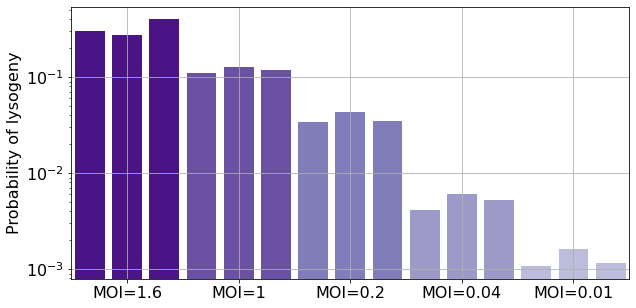

In [148]:
neg_idx = [21,22];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));
    
kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (10,5)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if name == "lysogen" or "neg" in name:
        next;
    else:
        color = colors_d[name]; 
        plt.bar(kk, np.power(2,sample_d[i].N0)/np.mean(neg_N0), color=color,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(kk+1);
        kk = kk+1;
#plt.grid(True)

#plt.ylim((0,80))
plt.xlim((-0.5,14.5))
#plt.legend(fontsize=12,ncol=4,framealpha=1)
plt.xticks([1,4,7,10,13],['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01']); 
plt.ylabel('Probability of lysogeny')
plt.grid(True)
plt.yscale('log')

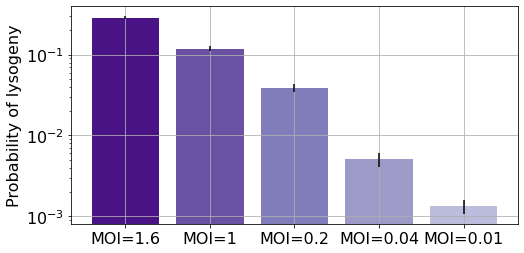

In [150]:
MOI_16 = np.array([2,3,4])
MOI_1 = np.array([5,6,7])
MOI_02 = np.array([8,9,10])
MOI_004 = np.array([11,12,13])
MOI_001 = np.array([14,15,16])
idx_lys = np.array([17,18,19])
idx_neg = np.array([21,22])
idx_blank = np.array([24,25])

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)

plt.rcParams["figure.figsize"] = (8,4)
k = 0;
labels = ['MOI=1.6','MOI=1','MOI=0.2','MOI=0.04','MOI=0.01']
colors = ['#4a1486','#6a51a3','#807dba','#9e9ac8','#bcbddc']
for i in (MOI_16, MOI_1, MOI_02, MOI_004, MOI_001):
    growth_rate_all = np.array([]);
    for kk in range(0,len(sample)):
        growth_rate_all = np.append(growth_rate_all, np.power(2, sample_d[i[kk]].N0)/np.mean(neg_N0)); 
    growth_rate_mean = np.mean(growth_rate_all);
    growth_rate_err = np.std(growth_rate_all); 
    plt.bar(k, growth_rate_mean, yerr=growth_rate_err, color = colors[k],label=labels[k])
    k = k+1; 
#plt.xlim((0,100))
#plt.ylim((0,80))
#plt.legend(labelcolor='linecolor',ncol=4); 
plt.grid(True);
plt.ylabel('Probability of lysogeny'); 
plt.xticks([0,1,2,3,4],labels)
plt.yscale('log')

## probability of lysogeny versus MOI

In [159]:
np.math.factorial(4)

24

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


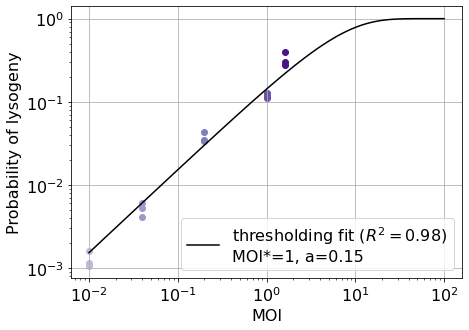

In [225]:
xdata = [];
ydata = []; 
labels = [];

kk = 0;
plt.rcParams["figure.figsize"] = (7,5)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=1.6" in name:
        x_ = 1.6;
    elif name == "MOI=1":
        x_ = 1;
    elif "MOI=0.2" in name:
        x_ = 0.2;
    elif "MOI=0.04" in name:
        x_ = 0.04;
    elif "MOI=0.01" in name:
        x_ = 0.01;
    if name == "lysogen" or "neg" in name:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model2(moi, a, moi_s):
    S = 0;
    for n in range(0, int(moi_s)):
        S = S + np.power(a*moi, n)*np.exp(-a*moi)/np.math.factorial(n); 
    return np.log(1 - S)

#'''
xdata = np.array(xdata); ydata=np.array(ydata);
popt, pcov = curve_fit(model2, xdata, np.log(ydata),p0=[0.2,1], maxfev=10000)
residuals = np.log(ydata) - model2(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.log(ydata)-np.mean(np.log(ydata)))**2)
r_squared = 1 - (ss_res / ss_tot)
x_data = np.logspace(-2,2,100)
plt.plot(x_data, np.exp(model2(x_data, *popt)), color='black', label='thresholding fit ('+ '$R^2=$'+str(r_squared)[:4]+')\n'+\
         'MOI*=1, '+'a='+str(popt[0])[:4])#+', b='+str(popt[-1])[:4])
#plt.plot(xdata, model2(xdata, popt[0],2), color='red', label='fit (MOI*=2)')

#'''
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MOI')
plt.legend(loc='lower right')
plt.ylabel('Probability of lysogeny')
plt.grid(True)

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


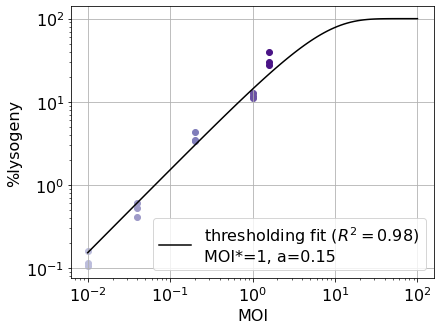

In [230]:
xdata = [];
ydata = []; 
labels = [];

kk = 0;
plt.rcParams["figure.figsize"] = (6.5,5)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=1.6" in name:
        x_ = 1.6;
    elif name == "MOI=1":
        x_ = 1;
    elif "MOI=0.2" in name:
        x_ = 0.2;
    elif "MOI=0.04" in name:
        x_ = 0.04;
    elif "MOI=0.01" in name:
        x_ = 0.01;
    if name == "lysogen" or "neg" in name:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, 100*ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model2(moi, a, moi_s):
    S = 0;
    for n in range(0, int(moi_s)):
        S = S + np.power(a*moi, n)*np.exp(-a*moi)/np.math.factorial(n); 
    return np.log(1 - S)

#'''
xdata = np.array(xdata); ydata=np.array(ydata);
popt, pcov = curve_fit(model2, xdata, np.log(ydata),p0=[0.2,1], maxfev=10000)
residuals = np.log(ydata) - model2(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.log(ydata)-np.mean(np.log(ydata)))**2)
r_squared = 1 - (ss_res / ss_tot)
x_data = np.logspace(-2,2,100)
plt.plot(x_data, 100*np.exp(model2(x_data, *popt)), color='black', label='thresholding fit ('+ '$R^2=$'+str(r_squared)[:4]+')\n'+\
         'MOI*=1, '+'a='+str(popt[0])[:4])#+', b='+str(popt[-1])[:4])
#plt.plot(xdata, model2(xdata, popt[0],2), color='red', label='fit (MOI*=2)')

#'''
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MOI')
plt.legend(loc='lower right')
plt.ylabel('%lysogeny')
plt.grid(True)

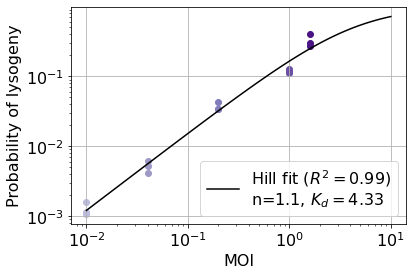

In [210]:
xdata = [];
ydata = []; 
labels = [];

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "MOI=1.6" in name:
        x_ = 1.6;
    elif name == "MOI=1":
        x_ = 1;
    elif "MOI=0.2" in name:
        x_ = 0.2;
    elif "MOI=0.04" in name:
        x_ = 0.04;
    elif "MOI=0.01" in name:
        x_ = 0.01;
    if name == "lysogen" or "neg" in name:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model3(moi, kd, h):
    return np.log(moi**h/(moi**h+kd**h))

#'''
xdata = np.array(xdata); ydata=np.array(ydata);
popt, pcov = curve_fit(model3, xdata, np.log(ydata),p0=[2,1], maxfev=10000)
residuals = np.log(ydata) - model3(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.log(ydata)-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
x_data = np.logspace(-2,1,100)
plt.plot(x_data, np.exp(model3(x_data, *popt)), color='black', label='Hill fit ('+'$R^2=$'+str(r_squared)[:4]+')\n'+\
         'n='+str(popt[1])[:3]+', '+'$K_d=$'+str(popt[0])[:4])

#'''
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MOI')
plt.legend(loc='lower right')
plt.ylabel('Probability of lysogeny')
plt.grid(True)